## Capstone Mini-Project: Data Wrangling

### Data Collection and Description
Data is obtained from Kaggle: https://www.kaggle.com/mehdidag/black-friday
The dataset is a sample of transactions made in a retail store for one month. It contains customer demographics such as age, gender and marital status, product details including product id and product category, and purchase amount for the whole month.<br>
Dataset from Kaggle is pretty clean and ready to use, not much data wrangling is required.

### Data Inspection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read data and inspect the first few rows
retail_data = pd.read_csv('BlackFriday.csv')
retail_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
retail_data.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


In [4]:
# Check if there's any duplicated rows
sum(retail_data.duplicated())

0

In [5]:
# Convert column names to lower case
retail_data.columns = [col.lower() for col in retail_data.columns]

In [6]:
# Check the data types for each column and total count of null entries 
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
user_id                       537577 non-null int64
product_id                    537577 non-null object
gender                        537577 non-null object
age                           537577 non-null object
occupation                    537577 non-null int64
city_category                 537577 non-null object
stay_in_current_city_years    537577 non-null object
marital_status                537577 non-null int64
product_category_1            537577 non-null int64
product_category_2            370591 non-null float64
product_category_3            164278 non-null float64
purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [7]:
# Convert categorical features into 'category' data type
for col in ['gender', 'age', 'occupation', 'city_category', 'stay_in_current_city_years',
            'marital_status', 'product_category_1', 'product_category_2','product_category_3']:
    retail_data[col] = retail_data[col].astype('category')

In [8]:
# See how many categories in each categorial column
for col in ['gender', 'age', 'occupation', 'city_category', 'stay_in_current_city_years',
            'marital_status', 'product_category_1', 'product_category_2', 'product_category_3']:
    print('{}: {}' .format(col, retail_data[col].cat.categories))

gender: Index(['F', 'M'], dtype='object')
age: Index(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'], dtype='object')
occupation: Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20],
           dtype='int64')
city_category: Index(['A', 'B', 'C'], dtype='object')
stay_in_current_city_years: Index(['0', '1', '2', '3', '4+'], dtype='object')
marital_status: Int64Index([0, 1], dtype='int64')
product_category_1: Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], dtype='int64')
product_category_2: Float64Index([ 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0,
              13.0, 14.0, 15.0, 16.0, 17.0, 18.0],
             dtype='float64')
product_category_3: Float64Index([ 3.0,  4.0,  5.0,  6.0,  8.0,  9.0, 10.0, 11.0, 12.0, 13.0, 14.0,
              15.0, 16.0, 17.0, 18.0],
             dtype='float64')


From retail_data.info(), we find that only product_category_2 and product_category_3 have null entries. Use value_counts to futher check if there are other missing values not in the form of 'NaN'. 

In [9]:
for col in retail_data.columns:
    print('Value counts for {} is \n{}'.format(col, retail_data[col].value_counts().head(20)))

Value counts for user_id is 
1001680    1025
1004277     978
1001941     898
1001181     861
1000889     822
1003618     766
1001150     752
1001015     739
1002909     717
1001449     714
1002063     708
1004344     705
1003391     697
1003841     697
1000424     694
1004510     690
1001980     684
1005795     680
1001088     679
1004227     676
Name: user_id, dtype: int64
Value counts for product_id is 
P00265242    1858
P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
P00184942    1424
P00046742    1417
P00058042    1396
P00059442    1384
P00145042    1384
P00237542    1374
P00255842    1354
P00117942    1346
P00110942    1336
P00010742    1331
P00110842    1260
P00220442    1253
P00051442    1233
P00102642    1228
P00117442    1227
Name: product_id, dtype: int64
Value counts for gender is 
M    405380
F    132197
Name: gender, dtype: int64
Value counts for age is 
26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903


It seems that there are no missing values in other forms. Then investigate a little bit more about the two columns having null entries. Notice that product_category_1 has 18 categories from 1 to 18, product_category_2 has 17 categories from 2 to 18, and product_category_3 has 16 categories from 3 to 18. 

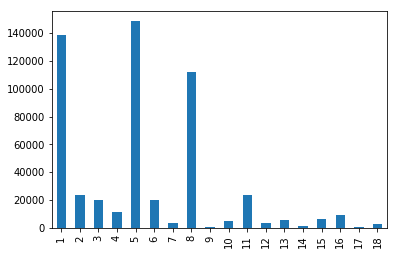

In [10]:
retail_data['product_category_1'].value_counts().sort_index().plot(kind='bar')

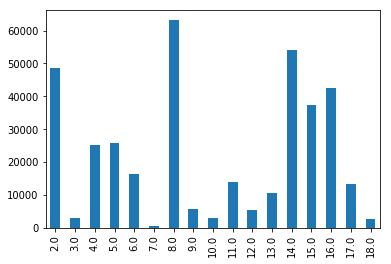

In [11]:
retail_data['product_category_2'].value_counts().sort_index().plot(kind='bar')

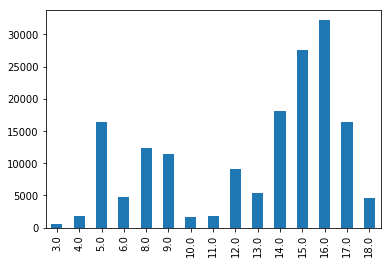

In [12]:
retail_data['product_category_3'].value_counts().sort_index().plot(kind='bar')

In [13]:
retail_data[retail_data['product_category_2'].isnull()].head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871
11,1000005,P00014542,M,26-35,20,A,1,1,8,NaN,NaN,3957


In [14]:
# Find for those nan value products in product_category_2, what categories are they in product_category_1? 
retail_data[retail_data['product_category_2'].isnull()]['product_category_1'].value_counts()

5     62788
8     59828
11    12202
16     9697
1      6498
7      3371
18     3075
15     2797
12     1748
14     1085
6       979
2       910
13      618
17      567
10      447
3       233
4       142
9         1
Name: product_category_1, dtype: int64

In [15]:
retail_data[retail_data['product_category_3'].isnull()]['product_category_2'].value_counts()

14.0    42352
16.0    41732
8.0     36528
15.0    23032
17.0    13130
5.0     10258
11.0     8239
4.0      6012
2.0      5588
13.0     4341
6.0      4272
12.0     4060
18.0     2730
9.0      2657
10.0      767
7.0       615
3.0         0
Name: product_category_2, dtype: int64

In [16]:
retail_data[retail_data['product_category_2'].isnull() & retail_data['product_category_3'].notnull()]

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase


For now, we know that all products must be within a category under product_category_1. <br>
Some of them belong to a category under product_category_2 and some not.<br>
There is no product that not belongs to a category in product_category_2 while belongs to a category in product_category_3. 

#### Investigate purchase column to see if there's any outliers

In [17]:
retail_data['purchase'].describe()

count    537577.000000
mean       9333.859853
std        4981.022133
min         185.000000
25%        5866.000000
50%        8062.000000
75%       12073.000000
max       23961.000000
Name: purchase, dtype: float64

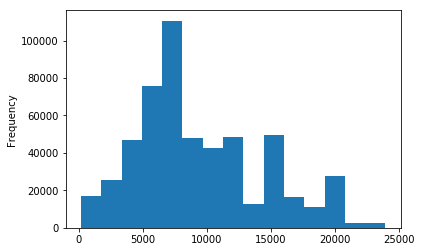

In [18]:
retail_data['purchase'].plot(kind='hist', bins=15)